# Description of the main hypothesis

El Niño is the warm phase of the El Niño–Southern Oscillation (ENSO) and is associated with a band of warm ocean water that develops in the central and east-central equatorial Pacific, including the area off the Pacific coast of South America. The ENSO is the cycle of warm and cold sea surface temperature (SST) of the tropical central and eastern Pacific Ocean. 

El Niño phases are known to last close to four years; however, records demonstrate that the cycles have lasted between two and seven years. During the development of El Niño, rainfall develops between September–November. The cool phase of ENSO is Spanish: La Niña. The ENSO cycle, including both El Niño and La Niña, causes global changes in temperature and rainfall.


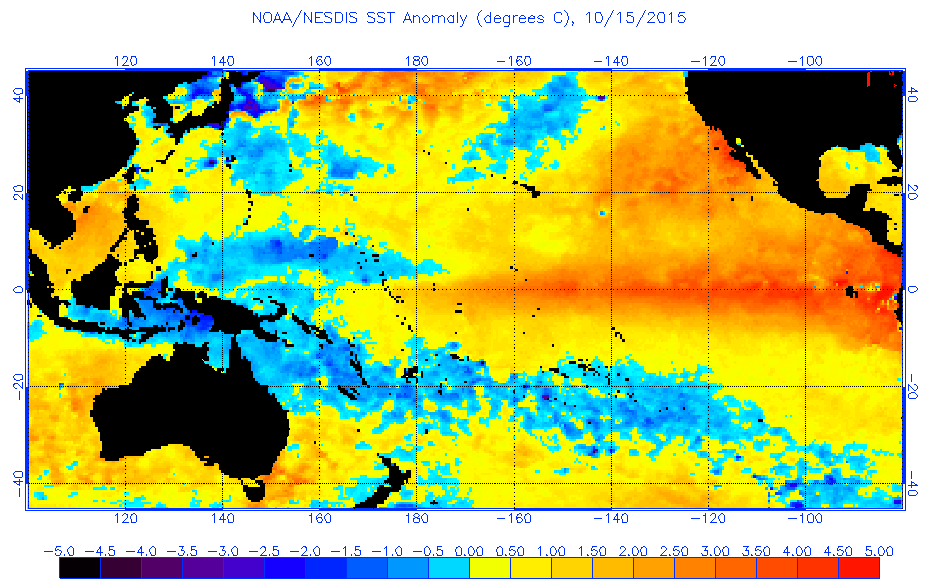

The largest El Niño event of the 21st century was in 2015-16. Numerous reports have been published relating 2015 as the worst year of shark attacks ever.


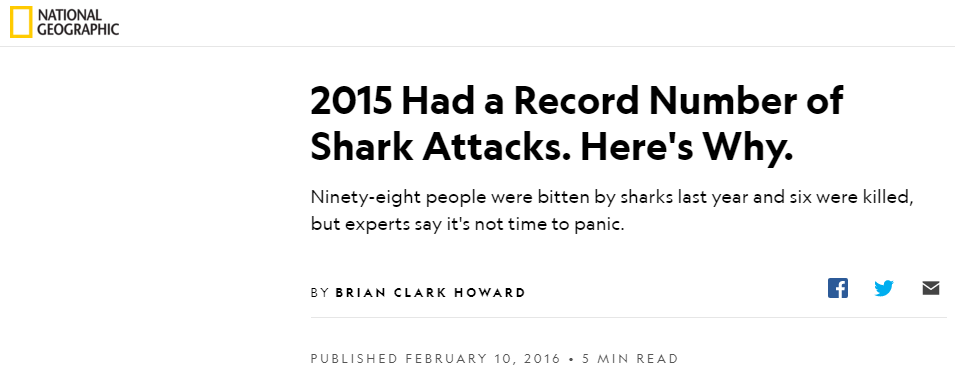


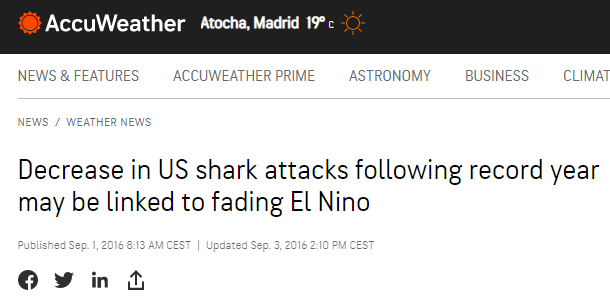

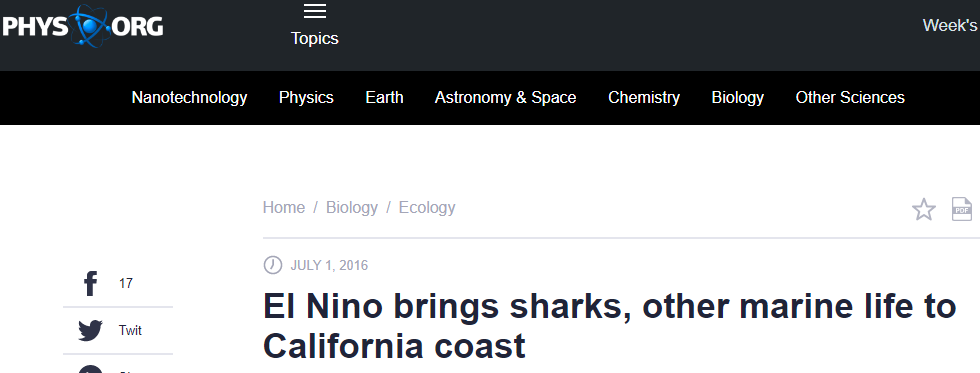

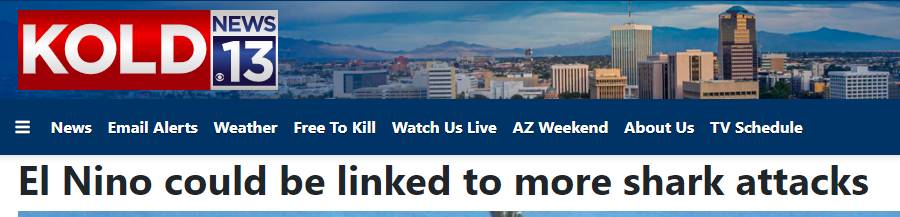

NULL HYPOTHESIS (H0): THE DATA REALLY SHOWS AN INCREASE OF CASES DURING THE YEAR 2015 DUE TO "EL NIÑO" EFFECT

## Let's start working with our (partially) cleaned database

In [1]:
# Basic imports

import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt
from IPython.display import display_html
from itertools import chain,cycle

# This is a function to display multiple tables in the same row

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    
#Custom function to display errors

def display_errors(df):
    
    total_nas = pd.DataFrame(df.isna().sum())
    total_null = pd.DataFrame(df.isnull().sum())
    duplicated = pd.DataFrame(df.duplicated().value_counts())


    return display_side_by_side(total_nas, total_null, duplicated, titles=['Sum of NAs', "Sum of Nuls", "Number of Duplicates"])

In [2]:
#Dict of random colors

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

colors2 = {"Red": "#FF0000", "White":"#FFFFFF", "Cyan": "#00FFFF", "Silver":"#C0C0C0",
          "Blue":"#0000FF", "Gray":"#808080", "DarkBlue":"#00008B", "Black":"#000000",
           "LightBlue":"#ADD8E6", "Orange":"#FFA500", "LightBlue":"#ADD8E6","Orange":"#FFA500",
           "Purple":"#800080", "Brown":"#A52A2A", "Yellow":"#FFFF00", "Maroon":"#800000",
           "Lime":"00FF00", "Green":"#008000", "Magenta":"#FF00FF","Olive":"#808000", 
           "Magenta":"#FF00FF", "Olive":"#808000", "Pink":"#FFC0CB", "Aquamarine":"#7FFD4"
          }

In [3]:
# Check if the database is ok

sharks = pd.read_csv("../data/attacks_cleaned.csv")
display(sharks.head(), display_errors(sharks), sharks.shape)


,0
Month,0
Year,0
Type,152
Country,0
Location,12
Activity,16
Sex,8
Age,244
Injury,0
Fatal (Y/N),80


,Month,Year,Type,Country,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,Jun,2018,NaN,USA,"Oceanside, San Diego County",Paddling,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,Jun,2018,Unprovoked,USA,"St. Simon Island, Glynn County",Standing,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN
2,Jun,2018,NaN,USA,"Habush, Oahu",Surfing,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,Jun,2018,Unprovoked,Brazil,"Piedade Beach, Recife",Swimming,M,18.0,FATAL,Y,Late afternoon,Tiger shark
4,May,2018,Unprovoked,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52.0,Minor injury to foot. PROVOKED INCIDENT,N,NaN,Lemon shark


None

(2874, 12)

Because we want to compare the number of cases of 2015 with the rest of the years and also other El Niño years, our main columns will be "Month" and "Year". El Niño is a seasonal phenomena, therefore we need to see the differences month by month.

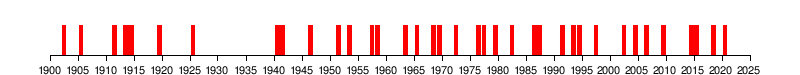

It is thought that there have been at least 30 El Niño events since 1900, with the 1982–83, 1997–98 and 2014–16 events among the strongest on record.

Major ENSO events were recorded in the following years:

- 1790-93
- 1828
- 1876-78
- 1891
- 1925-26
- 1972-73
- 1982-83
- 1997-98
- 2014-16

Let's see what we have:

In [4]:
min_=sharks["Year"].min()
max_=sharks["Year"].max()

print(f"The minimum year is {min_} and the maximum is {max_}")

The minimum year is 1703 and the maximum is 2018


We can now group our date by year and month:

## Grouping by month and year

In [5]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sharks["Month"] = pd.Categorical(sharks["Month"], categories=months, ordered=True)
sharks.sort_values(by=["Month", "Year"],inplace=True)
sharks.reset_index()

#OPTIONAL

sharks_month_year = pd.DataFrame(sharks.groupby("Year")["Month"].value_counts())

display(sharks_month_year)

"""Total number of cases by month and year"""

Month
Year           
1703 Mar      1
     Jan      0
     Feb      0
     Apr      0
     May      0
...         ...
2018 Aug      0
     Sep      0
     Oct      0
     Nov      0
     Dec      0

[1620 rows x 1 columns]

'Total number of cases by month and year'

In [6]:
#sharks.groupby("Year")["Month"].value_counts().plot(kind = "bar", figsize = (200,50))
#plt.xticks(rotation=90)
#plt.show()

## Total cases per Year

<AxesSubplot:xlabel='Year', ylabel='count'>

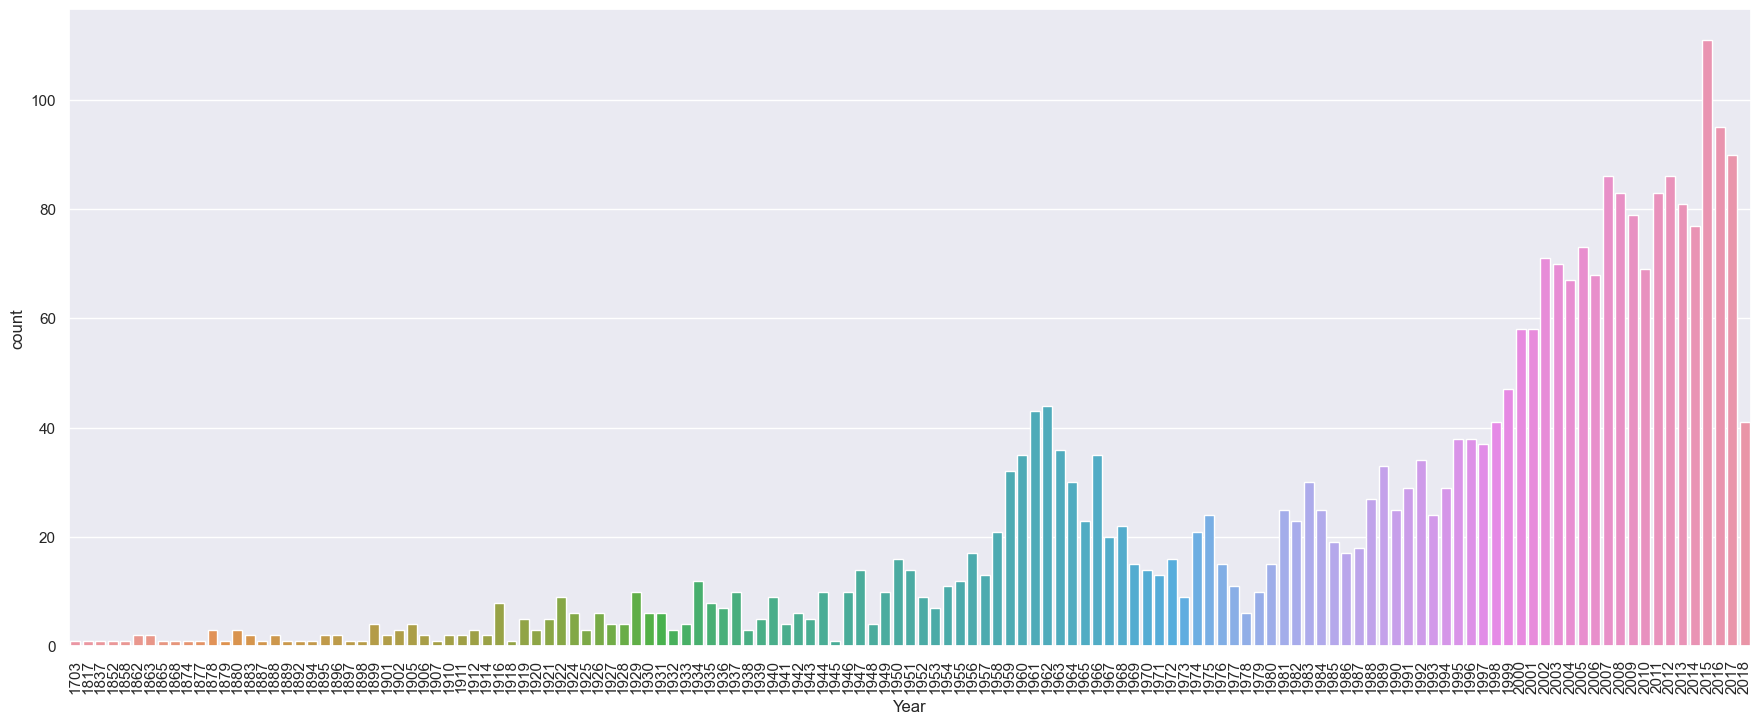

In [7]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
plt.xticks(rotation=90)
sns.countplot(x=sharks.Year)

## Total cases per Month

<AxesSubplot:xlabel='Month', ylabel='count'>

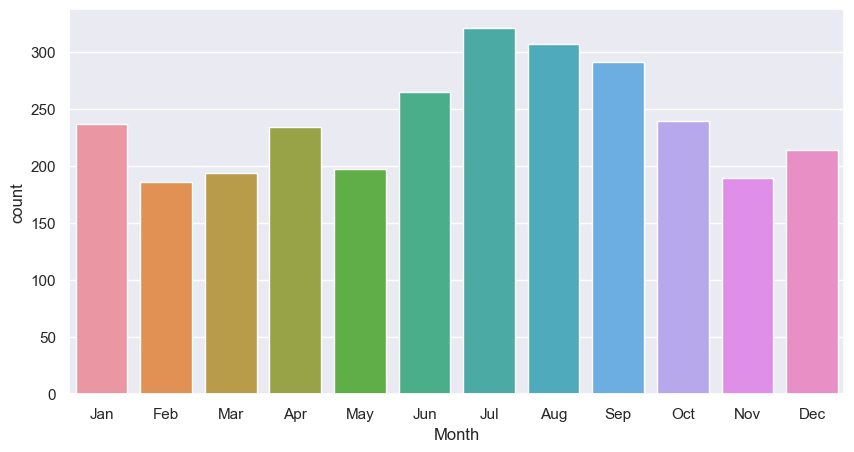

In [8]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=sharks.Month)

## Total cases per Country

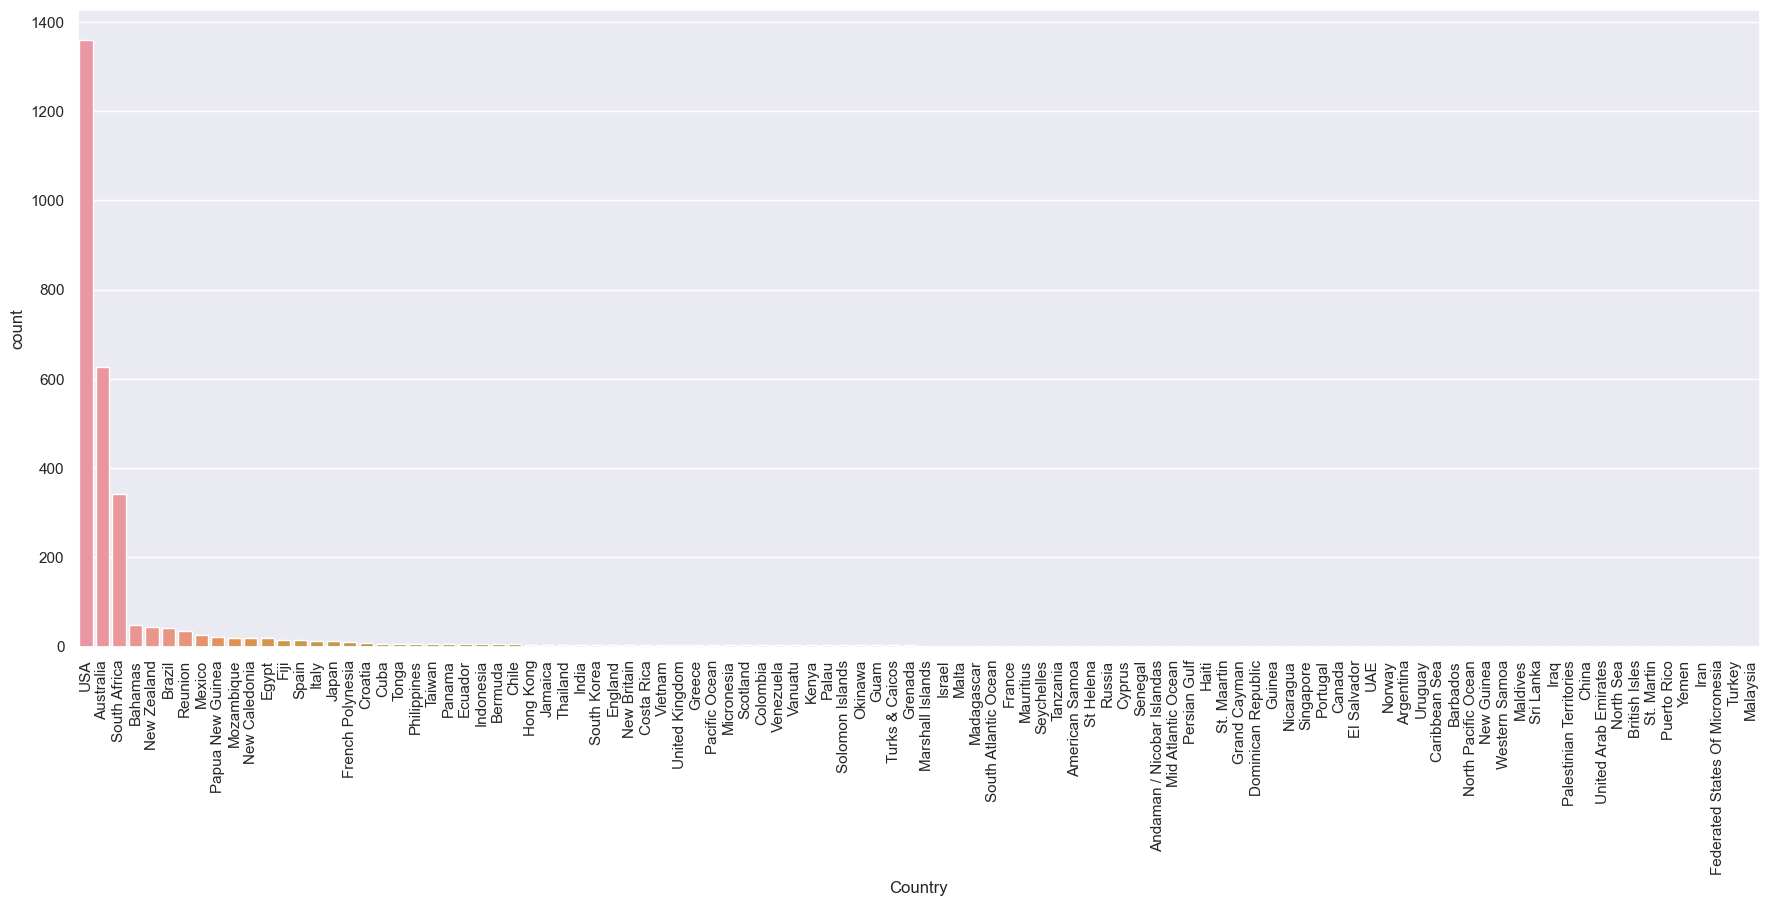

In [9]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.countplot(x=sharks.Country, order = sharks["Country"].value_counts().index).tick_params(axis='x', rotation=90)

As it is shown, it has no sense to plot those countries which have a very low cases. We are going to focus only on the first 27.

In [15]:
country_df = pd.DataFrame(sharks["Country"].value_counts().iloc[0:10])

In [45]:
#DON'T LOOK AT THAT
#sns.set(rc={'figure.figsize':(21.7,8.27)})
#sns.barplot(x=country_df.Country, y=country_df.Country.value_counts()).tick_params(axis='x', rotation=90)

<AxesSubplot:>

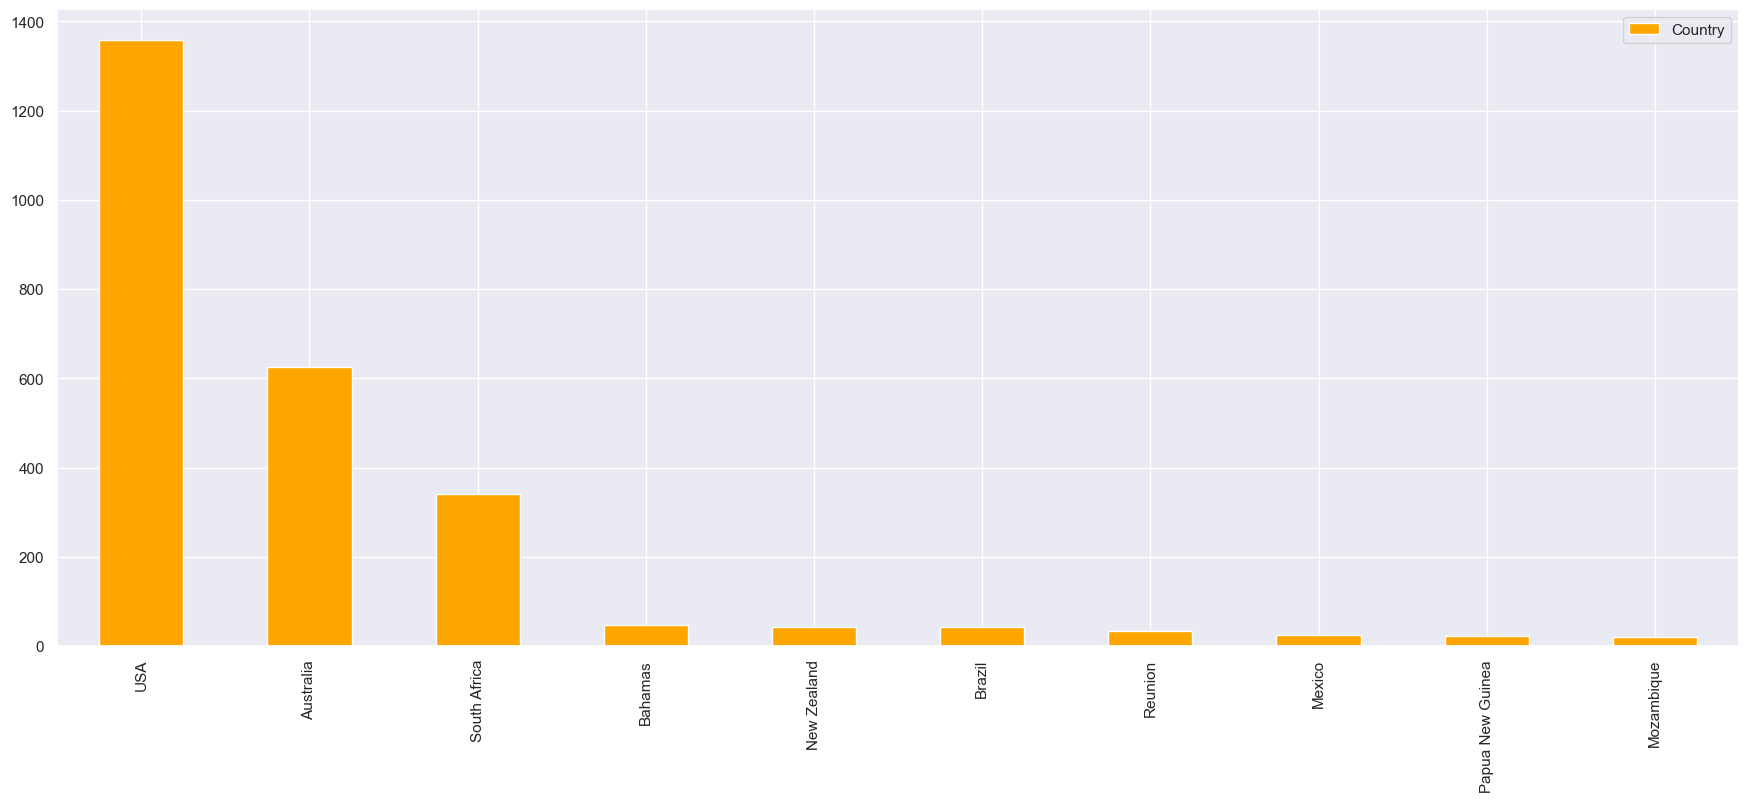

In [34]:
country_df.plot(kind = "bar", color=random.choice(list(colors2.values())))